In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!python3 -c "import keras; print(keras.__version__)"


In [ ]:
!python3 -c "import cv2; print(cv2.__version__)"

4.8.0


# Lấy data nếu chưa có dữ liệu trên drive


In [ ]:
# Nhập địa chỉ đường dẫn file .zip để giải nén file
!unzip /content/drive/MyDrive/Dataset/Dataset.zip

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Lấy dữ liệu trong tập dữ liệu được chia thành 2 tập train, val

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS = 72, 128, 3

In [ ]:
img_height, img_width = IMAGE_HEIGHT, IMAGE_WIDTH
batch_size = 20
# Yêu cầu đường dẫn đến folder train trong tập dữ liệu
train_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/Data/train",
    image_size = (img_height, img_width),
    batch_size = batch_size,

)
# Yêu cầu đường dẫn đến folder val trong tập dữ liệu

val_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/Data/val",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
# test_ds = tf.keras.utils.image_dataset_from_directory(
#     "fruits/test",
#     image_size = (img_height, img_width),
#     batch_size = batch_size
# )

# show ra các classes trong tập dữ liệu
class_names = train_ds.class_names
class_names_val = val_ds.class_names
print("Class names:", class_names)
print("Class names:", class_names_val)


Found 9326 files belonging to 4 classes.
Found 3140 files belonging to 4 classes.
Class names: ['forward', 'left', 'loiter', 'right']
Class names: ['forward', 'left', 'loiter', 'right']


In [ ]:
import os
from PIL import Image

def dem_so_anh(trong_thu_muc,name):
    # Đường dẫn đến thư mục chứa ảnh
    duong_dan = trong_thu_muc

    # Định dạng tệp ảnh được hỗ trợ (có thể điều chỉnh theo nhu cầu)
    dinh_dang_anh = [".png", ".jpg", ".jpeg", ".gif", ".bmp"]

    # Sử dụng os.listdir để lấy danh sách tất cả các tệp trong thư mục
    danh_sach_tep = os.listdir(duong_dan)

    # Sử dụng list comprehension để lọc ra các tệp ảnh
    danh_sach_anh = [tep for tep in danh_sach_tep if any(tep.lower().endswith(dinh_dang) for dinh_dang in dinh_dang_anh)]

    # In số lượng ảnh
    print(f"Số lượng ảnh trong thư mục '{name}': {len(danh_sach_anh)}")

## Đếm số ảnh trong từng class trong tập train và val

In [ ]:
import os

def list_subdirectories(parent_dir):
    subdirectories = [os.path.basename(f.path) for f in os.scandir(parent_dir) if f.is_dir()]

    return subdirectories

# Thay đổi đường dẫn này thành đường dẫn thư mục mẹ bạn muốn kiểm tra
print("Anh train\n")
parent_directory = "/content/drive/MyDrive/Data/train"

subdirectories = list_subdirectories(parent_directory)
print("Các thư mục con trong thư mục mẹ là:")
for directory in subdirectories:
    subdirectory_path = os.path.join(parent_directory, directory)
    dem_so_anh(subdirectory_path,directory)

print("Anh val\n")
parent_directory = "/content/drive/MyDrive/Data/val"

subdirectories = list_subdirectories(parent_directory)
print("Các thư mục con trong thư mục mẹ là:")
for directory in subdirectories:
    subdirectory_path = os.path.join(parent_directory, directory)
    dem_so_anh(subdirectory_path,directory)



Anh train

Các thư mục con trong thư mục mẹ là:
Số lượng ảnh trong thư mục 'forward': 2089
Số lượng ảnh trong thư mục 'left': 2678
Số lượng ảnh trong thư mục 'loiter': 1885
Số lượng ảnh trong thư mục 'right': 2674
Anh val

Các thư mục con trong thư mục mẹ là:
Số lượng ảnh trong thư mục 'forward': 703
Số lượng ảnh trong thư mục 'left': 904
Số lượng ảnh trong thư mục 'loiter': 634
Số lượng ảnh trong thư mục 'right': 899


## Chuẩn hóa dữ liệu [0,255] -> [0,1]

In [ ]:
# Chuẩn hóa dữ liệu thuộc [0,1]
train_ds_1 = train_ds.map(lambda x, y: (x / 255.0, y))
val_ds_1 = val_ds.map(lambda x, y: (x / 255.0, y))

## Trực quan hóa dữ liệu

In [ ]:
# Assuming classifications is the output of your model
for images, labels in train_ds.take(1):
    # Original pixel values (before normalization)
    original_images = images.numpy()

    # Normalized pixel values (after division by 255)
    normalized_images = original_images / 255.0

    # Display pixel values for a few images
    num_images_to_display = 2
    for i in range(num_images_to_display):
        print(f"Original Image {i + 1}:\n{original_images[i]}\n")
        print(f"Normalized Image {i + 1}:\n{normalized_images[i]}\n")

Original Image 1:
[[[53.   55.   52.  ]
  [53.   55.   52.  ]
  [53.   55.   52.  ]
  ...
  [40.   36.   45.  ]
  [37.   33.   42.  ]
  [35.   31.   40.  ]]

 [[52.75 54.75 51.75]
  [55.75 53.75 51.75]
  [53.   55.   52.  ]
  ...
  [38.   34.   43.  ]
  [34.75 30.75 39.75]
  [34.   30.   39.  ]]

 [[53.   55.   52.  ]
  [55.   55.   52.  ]
  [53.   55.   52.  ]
  ...
  [36.   32.   43.  ]
  [33.5  29.5  40.5 ]
  [31.75 27.75 38.75]]

 ...

 [[57.   62.   61.  ]
  [57.   62.   61.  ]
  [57.   62.   58.  ]
  ...
  [75.   68.   66.  ]
  [73.   66.   64.  ]
  [71.5  64.5  62.5 ]]

 [[58.   63.   62.  ]
  [58.   63.   62.  ]
  [58.   63.   62.  ]
  ...
  [73.   66.   64.  ]
  [72.   65.   63.  ]
  [72.   65.   63.  ]]

 [[58.   63.   62.  ]
  [58.   63.   62.  ]
  [58.   63.   59.  ]
  ...
  [72.   65.   63.  ]
  [72.   65.   63.  ]
  [72.   65.   63.  ]]]

Normalized Image 1:
[[[0.20784314 0.21568628 0.20392157]
  [0.20784314 0.21568628 0.20392157]
  [0.20784314 0.21568628 0.20392157]
  ..

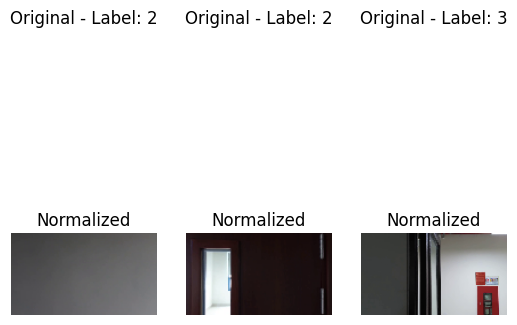

In [ ]:
import matplotlib.pyplot as plt

# Iterate through a few batches of the normalized dataset
for images, labels in train_ds.take(1):
    # Choose a few random images
    num_samples = 3
    random_indices = tf.random.uniform(shape=(num_samples,), maxval=batch_size, dtype=tf.int32)

    # Display the original and normalized images
    for i in range(num_samples):
        original_image = images[random_indices[i]].numpy()
        normalized_image = original_image / 255.0

        # Display original image
        plt.subplot(2, num_samples, i + 1)
        plt.imshow(original_image)
        plt.title(f'Original - Label: {labels[random_indices[i]].numpy()}')
        plt.axis('off')

        # Display normalized image
        plt.subplot(2, num_samples, i + num_samples + 1)
        plt.imshow(normalized_image)
        plt.title('Normalized')
        plt.axis('off')

    plt.show()

# Chuẩn bị Training

## Import thư viện cần thiết

In [ ]:
#import thu vien:
import pandas as pd
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.layers import Lambda, Conv2D, MaxPooling2D, Dropout, Dense, Flatten, BatchNormalization, Input, Activation,add
from keras import regularizers
#from keras.utils import np_utils
#from keras.layers.merge import add

(72, 128, 3)
(72, 128, 3)
(72, 128, 3)
(72, 128, 3)
(72, 128, 3)
(72, 128, 3)
(72, 128, 3)
(72, 128, 3)
(72, 128, 3)


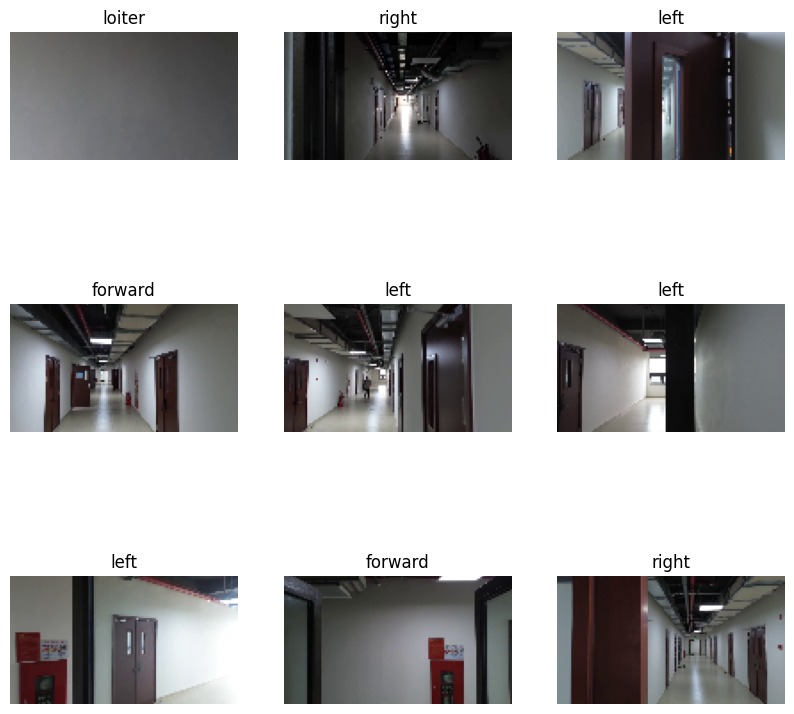

In [ ]:
# Check kích thước ảnh
#class_names = ["idle", "left", "right","up"]

class_names = ["forward","left","loiter","right"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
    print(images[i].shape)

### Kích thước ảnh "Chiều cao" "Chiều rộng" "Số chiều"

In [ ]:
# viet ham:
# Kích thước ảnh cho input của model
# IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS = 72, 160, 3

# Ta sẽ có 3 mô hình để training

### Mô hình Resnet8

In [ ]:
def resnet8(IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS):
  INPUT_SHAPE = Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS))
  x1 = Conv2D(32, (5, 5), strides=[2,2], padding='same')(INPUT_SHAPE)
  x1 = MaxPooling2D(pool_size=(3, 3), strides=[2,2])(x1)
      # First residual block: RES BLOCK 1
  x2 = BatchNormalization()(x1)
  x2 = Activation('relu')(x2)
  x2 = Conv2D(32, (3, 3), strides=[2,2], padding='same',
       kernel_initializer="he_normal",
       kernel_regularizer=regularizers.l2(1e-4))(x2)

  x2 = BatchNormalization()(x2)
  x2 = Activation('relu')(x2)
  x2 = Conv2D(32, (3, 3), padding='same',
       kernel_initializer="he_normal",
       kernel_regularizer=regularizers.l2(1e-4))(x2)

  x1 = Conv2D(32, (1, 1), strides=[2,2], padding='same')(x1)
  x3 = add([x1, x2])

      # Second residual block: RES BLOCK 2
  x4 = BatchNormalization()(x3)
  x4 = Activation('relu')(x4)
  x4 = Conv2D(64, (3, 3), strides=[2,2], padding='same',
                  kernel_initializer="he_normal",
                  kernel_regularizer=regularizers.l2(1e-4))(x4)

  x4 = BatchNormalization()(x4)
  x4 = Activation('relu')(x4)
  x4 = Conv2D(64, (3, 3), padding='same',
              kernel_initializer="he_normal",
              kernel_regularizer=regularizers.l2(1e-4))(x4)

  x3 = Conv2D(64, (1, 1), strides=[2,2], padding='same')(x3)
  x5 = add([x3, x4])

      # Third residual block: RES BLOCK 3
  x6 = BatchNormalization()(x5)
  x6 = Activation('relu')(x6)
  x6 = Conv2D(128, (3, 3), strides=[2,2], padding='same',
              kernel_initializer="he_normal",
              kernel_regularizer=regularizers.l2(1e-4))(x6)

  x6 = BatchNormalization()(x6)
  x6 = Activation('relu')(x6)
  x6 = Conv2D(128, (3, 3), padding='same',
              kernel_initializer="he_normal",
              kernel_regularizer=regularizers.l2(1e-4))(x6)

  x5 = Conv2D(128, (1, 1), strides=[2,2], padding='same')(x5)
  x7 = add([x5, x6])

      #Flatten
  x8 = Flatten()(x7)
  x8 = Activation('relu')(x8)
  x8 = Dropout(0.5)(x8)

  x9 = Dense(512, activation = "relu")(x8)
  x9 = Dropout(0.5)(x9)
  result =  Dense(4, activation = 'softmax')(x9)

  model = Model(inputs=[INPUT_SHAPE], outputs=[result])
  print(model.summary())
  return model

model = resnet8(IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 72, 128, 3)]         0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 36, 64, 32)           2432      ['input_1[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 17, 31, 32)           0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                                  
 batch_normalization (Batch  (None, 17, 31, 32)           128       ['max_pooling2d[0][0]']   

In [ ]:
import tensorflow as tf
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2_as_graph

# Tải mô hình ResNet50 từ Keras

# Tạo một tensor đầu vào giả (dummy input)
input_tensor = tf.random.normal([1, 72, 128, 3])

# Chuyển mô hình sang hàm cụ thể (concrete function)
concrete_func = tf.function(model).get_concrete_function(input_tensor)

# Chuyển mô hình sang dạng đồ thị tĩnh
frozen_func, graph_def = convert_variables_to_constants_v2_as_graph(concrete_func)

# Tính toán FLOPs
with tf.Graph().as_default() as graph:
    tf.graph_util.import_graph_def(graph_def, name='')

    with tf.compat.v1.Session(graph=graph) as sess:
        flops = tf.compat.v1.profiler.profile(
            graph,
            options=tf.compat.v1.profiler.ProfileOptionBuilder.float_operation()
        )
        print(f"Number of FLOPs: {flops.total_float_ops}")


Instructions for updating:
This API was designed for TensorFlow v1. See https://www.tensorflow.org/guide/migrate for instructions on how to migrate your code to TensorFlow v2.


Number of FLOPs: 28592888


# Mô hình Resnet 18

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, Add, MaxPooling2D, GlobalAveragePooling2D, Dense

def identity_block(x, filters, kernel_size=3):
    # Identity block: three convolutional layers with batch normalization
    x_copy = x

    x = Conv2D(filters, kernel_size, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters, kernel_size, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters, kernel_size, padding='same')(x)
    x = BatchNormalization()(x)

    x = Add()([x, x_copy])
    x = Activation('relu')(x)

    return x

def convolutional_block(x, filters, kernel_size=3, strides=2):
    # Convolutional block: shortcut connection is a convolutional layer
    x_copy = x

    x = Conv2D(filters, kernel_size, padding='same', strides=strides)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters, kernel_size, padding='same')(x)
    x = BatchNormalization()(x)

    x_copy = Conv2D(filters, kernel_size=1, padding='same', strides=strides)(x_copy)
    x_copy = BatchNormalization()(x_copy)

    x = Add()([x, x_copy])
    x = Activation('relu')(x)

    return x

def build_resnet18(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS), num_classes=4):
    input_tensor = Input(shape=input_shape)

    x = Conv2D(64, (7, 7), padding='same', strides=2)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((3, 3), padding='same', strides=2)(x)


    x = convolutional_block(x, 64, strides=1)
    x = identity_block(x, 64)

    x = convolutional_block(x, 128)
    x = identity_block(x, 128)

    # x = convolutional_block(x, 128)
    # x = identity_block(x, 128)

    x = convolutional_block(x, 256)
    x = identity_block(x, 256)

    x = convolutional_block(x, 256)
    x = identity_block(x, 256)

    # x = convolutional_block(x, 512)
    # x = identity_block(x, 512)

    x = GlobalAveragePooling2D()(x)
    x = Dense(num_classes, activation='softmax')(x)

    model = tf.keras.models.Model(inputs=input_tensor, outputs=x, name='resnet18')

    return model

# Tạo mô hình ResNet-18 tùy chỉnh
model = build_resnet18(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS), num_classes=4)

# Hiển thị tóm tắt của mô hình
model.summary()


Model: "resnet18"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 72, 128, 3)]         0         []                            
                                                                                                  
 conv2d_10 (Conv2D)          (None, 36, 64, 64)           9472      ['input_2[0][0]']             
                                                                                                  
 batch_normalization_6 (Bat  (None, 36, 64, 64)           256       ['conv2d_10[0][0]']           
 chNormalization)                                                                                 
                                                                                                  
 activation_7 (Activation)   (None, 36, 64, 64)           0         ['batch_normalization_6

# Mô hình Resnet 169

In [ ]:
# Mô hình Resnet169
import tensorflow as tf

def conv_block(input_tensor, kernel_size, filters, stage, block, strides=(2, 2)):
    """Convolutional block."""
    filters1, filters2, filters3 = filters
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    x = tf.keras.layers.Conv2D(filters1, (1, 1), strides=strides,
                               name=conv_name_base + '2a')(input_tensor)
    x = tf.keras.layers.BatchNormalization(name=bn_name_base + '2a')(x)
    x = tf.keras.layers.Activation('relu')(x)

    x = tf.keras.layers.Conv2D(filters2, kernel_size, padding='same',
                               name=conv_name_base + '2b')(x)
    x = tf.keras.layers.BatchNormalization(name=bn_name_base + '2b')(x)
    x = tf.keras.layers.Activation('relu')(x)

    x = tf.keras.layers.Conv2D(filters3, (1, 1), name=conv_name_base + '2c')(x)
    x = tf.keras.layers.BatchNormalization(name=bn_name_base + '2c')(x)

    shortcut = tf.keras.layers.Conv2D(filters3, (1, 1), strides=strides,
                                      name=conv_name_base + '1')(input_tensor)
    shortcut = tf.keras.layers.BatchNormalization(name=bn_name_base + '1')(shortcut)

    x = tf.keras.layers.add([x, shortcut])
    x = tf.keras.layers.Activation('relu')(x)
    return x

def identity_block(input_tensor, kernel_size, filters, stage, block):
    """Identity block."""
    filters1, filters2, filters3 = filters
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    x = tf.keras.layers.Conv2D(filters1, (1, 1),
                               name=conv_name_base + '2a')(input_tensor)
    x = tf.keras.layers.BatchNormalization(name=bn_name_base + '2a')(x)
    x = tf.keras.layers.Activation('relu')(x)

    x = tf.keras.layers.Conv2D(filters2, kernel_size, padding='same',
                               name=conv_name_base + '2b')(x)
    x = tf.keras.layers.BatchNormalization(name=bn_name_base + '2b')(x)
    x = tf.keras.layers.Activation('relu')(x)

    x = tf.keras.layers.Conv2D(filters3, (1, 1), name=conv_name_base + '2c')(x)
    x = tf.keras.layers.BatchNormalization(name=bn_name_base + '2c')(x)

    x = tf.keras.layers.add([x, input_tensor])
    x = tf.keras.layers.Activation('relu')(x)
    return x

def ResNet169(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS), classes=4):
    """ResNet169 architecture."""
    img_input = tf.keras.layers.Input(shape=input_shape)

    x = tf.keras.layers.ZeroPadding2D(padding=(3, 3))(img_input)
    x = tf.keras.layers.Conv2D(64, (7, 7), strides=(2, 2), name='conv1')(x)
    x = tf.keras.layers.BatchNormalization(name='bn_conv1')(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.MaxPooling2D((3, 3), strides=(2, 2))(x)

    x = conv_block(x, 3, [64, 64, 256], stage=2, block='a', strides=(1, 1))
    x = identity_block(x, 3, [64, 64, 256], stage=2, block='b')
    x = identity_block(x, 3, [64, 64, 256], stage=2, block='c')

    x = conv_block(x, 3, [128, 128, 512], stage=3, block='a')
    x = identity_block(x, 3, [128, 128, 512], stage=3, block='b')
    x = identity_block(x, 3, [128, 128, 512], stage=3, block='c')
    x = identity_block(x, 3, [128, 128, 512], stage=3, block='d')

    x = conv_block(x, 3, [256, 256, 1024], stage=4, block='a')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='b')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='c')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='d')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='e')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='f')

    x = conv_block(x, 3, [512, 512, 2048], stage=5, block='a')
    x = identity_block(x, 3, [512, 512, 2048], stage=5, block='b')
    x = identity_block(x, 3, [512, 512, 2048], stage=5, block='c')

    x = tf.keras.layers.GlobalAveragePooling2D(name='avg_pool')(x)
    x = tf.keras.layers.Dense(classes, activation='softmax', name='fc' + str(classes))(x)

    model = tf.keras.models.Model(inputs=img_input, outputs=x, name='resnet169')

    return model

# Creating ResNet169 model
model = ResNet169()

# Printing model summary
model.summary()


Model: "resnet169"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_10 (InputLayer)       [(None, 288, 640, 3)]        0         []                            
                                                                                                  
 zero_padding2d_2 (ZeroPadd  (None, 294, 646, 3)          0         ['input_10[0][0]']            
 ing2D)                                                                                           
                                                                                                  
 conv1 (Conv2D)              (None, 144, 320, 64)         9472      ['zero_padding2d_2[0][0]']    
                                                                                                  
 bn_conv1 (BatchNormalizati  (None, 144, 320, 64)         256       ['conv1[0][0]']       

+Mô hình YoloV5


In [ ]:
!git clone https://github.com/ultralytics/yolov5  # Cloning the YOLOv5 repository
%cd yolov5
!pip install -r requirements.txt  # Installing dependencies

fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5


# Training Model

In [ ]:
# import thư viện cần thiết
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
# Compile model, chỉ rõ hàm loss_function nào được sử dụng, phương thức dùng để tối ưu hàm loss function.
initial_learning_rate = 0.001
optimizer = SGD(learning_rate=initial_learning_rate,momentum = 0.9)

model.compile(    loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
# Checkpoint
from keras.callbacks import ModelCheckpoint

model_file = f"/content/drive/MyDrive/TrainingModel/Model_Result/Resnet18_new(20_6)/checkpoint/ResNet_18_v2_real_{IMAGE_HEIGHT}_{IMAGE_WIDTH}.h5"
checkpoint = ModelCheckpoint(model_file, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
# Tạo callback ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss',  # Độ đo để theo dõi (ví dụ: validation loss)
                              factor=0.1,          # Hệ số giảm learning rate (ví dụ: giảm 10 lần)
                              patience=5,          # Số epoch không thay đổi trước khi giảm learning rate
                              min_lr=1e-6)         # Learning rate tối thiểu

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.1,
                              patience=5,
                              min_lr=1e-6)

early_stopping_callback = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

callbacks_list = [checkpoint,reduce_lr,early_stopping_callback]

# Thực hiện train model với data
H = model.fit(x = train_ds_1, validation_data = val_ds_1,
          batch_size=256, epochs=300, verbose=1, callbacks=callbacks_list, shuffle=1)

Epoch 1/300
467/467 [==============================] - ETA: 0s - loss: 0.3629 - accuracy: 0.8624
Epoch 1: val_accuracy improved from -inf to 0.91210, saving model to /content/drive/MyDrive/TrainingModel/Model_Result/Resnet18_new(20_6)/checkpoint/ResNet_18_v2_real_72_128.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


467/467 [==============================] - 3183s 7s/step - loss: 0.3629 - accuracy: 0.8624 - val_loss: 0.3389 - val_accuracy: 0.9121 - lr: 0.0010
Epoch 2/300
465/467 [============================>.] - ETA: 0s - loss: 0.0433 - accuracy: 0.9875
Epoch 2: val_accuracy improved from 0.91210 to 0.99108, saving model to /content/drive/MyDrive/TrainingModel/Model_Result/Resnet18_new(20_6)/checkpoint/ResNet_18_v2_real_72_128.h5
467/467 [==============================] - 266s 564ms/step - loss: 0.0432 - accuracy: 0.9876 - val_loss: 0.0380 - val_accuracy: 0.9911 - lr: 0.0010
Epoch 3/300
467/467 [==============================] - ETA: 0s - loss: 0.0171 - accuracy: 0.9946
Epoch 3: val_accuracy improved from 0.99108 to 0.99713, saving model to /content/drive/MyDrive/TrainingModel/Model_Result/Resnet18_new(20_6)/checkpoint/ResNet_18_v2_real_72_128.h5
467/467 [==============================] - 240s 509ms/step - loss: 0.0171 - accuracy: 0.9946 - val_loss: 0.0123 - val_accuracy: 0.9971 - lr: 0.0010
Epoc

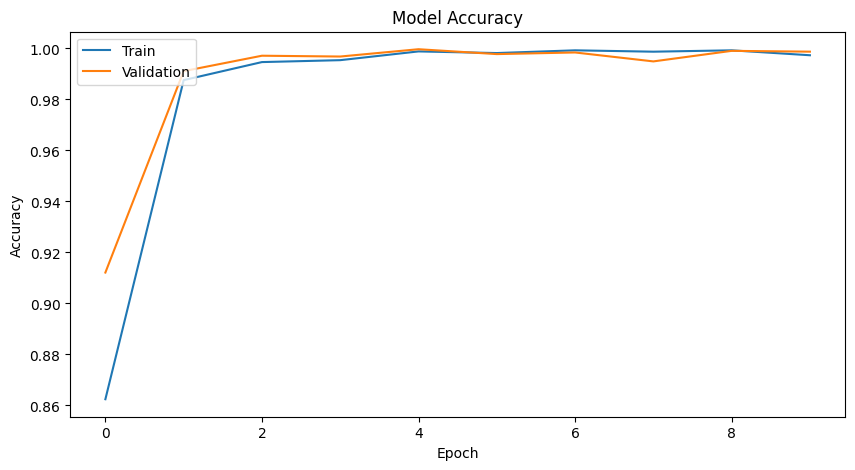

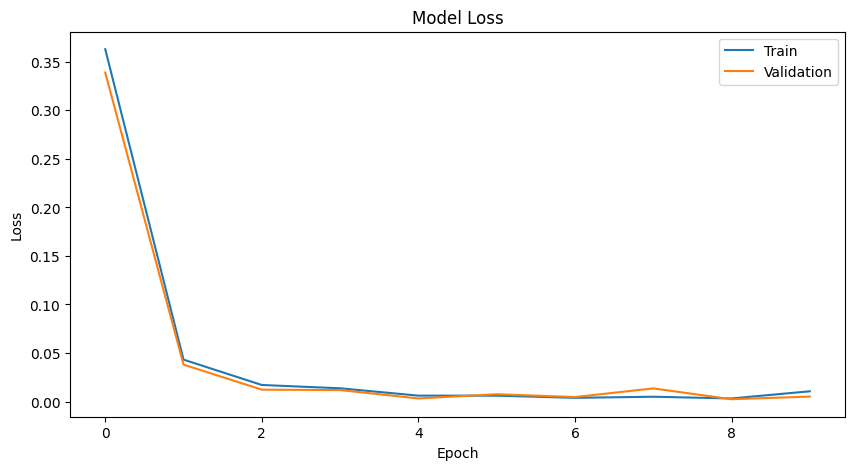

In [ ]:
# In đồ thị Accuracy
plt.figure(figsize=(10, 5))
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# In đồ thị Loss/Error
plt.figure(figsize=(10, 5))
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

## Đánh giá model

In [ ]:
# Nếu đã tồn tại model , ta thực hiện load model
from tensorflow.keras.models import load_model
model_path = f"/content/drive/MyDrive/TrainingModel/Model_Result/Resnet10_new(11_5)/checkpoint/ResNet_10_real_{IMAGE_HEIGHT}_{IMAGE_WIDTH}.h5"
model = load_model(model_path)
#resnet18_custom = load_model('/content/drive/MyDrive/DJI_AI/Model/checkpoint/ResNet_08_v2_real_72_160_normalize_checkpoint_resnet18.h5')

In [ ]:
model.evaluate(val_ds_1)

157/157 [==============================] - 57s 335ms/step - loss: 0.3778 - accuracy: 0.9564


[0.3777565360069275, 0.9563694000244141]

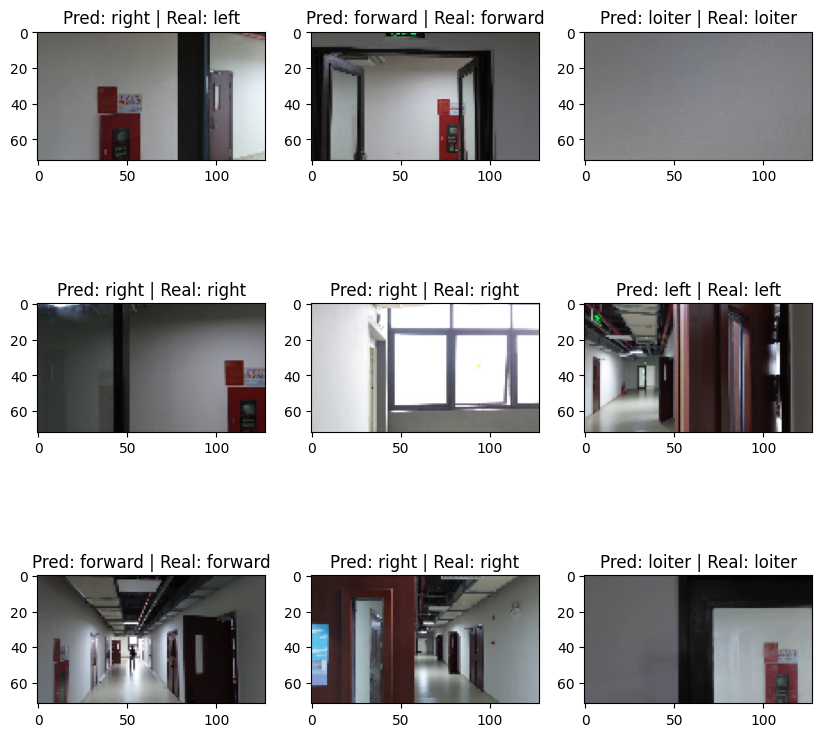

In [ ]:
# Đánh giá trực quan
import numpy

plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  #classifications = model(images/255)
  classifications = model(images/255)

  # print(classifications)

  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

## Convert

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open(f"/content/drive/MyDrive/TrainingModel/Model_Result_TFlite/Resnet10_new(11_5)/Resnet18_{IMAGE_HEIGHT}_{IMAGE_WIDTH}.tflite", 'wb') as f:
  f.write(tflite_model)

In [ ]:
import tensorflow as tf

interpreter = tf.lite.Interpreter(model_path=f"/content/drive/MyDrive/TrainingModel/Model_Result_TFlite/Resnet10_new(11_5)/Resnet18_{IMAGE_HEIGHT}_{IMAGE_WIDTH}.tflite")
interpreter.allocate_tensors()

# Print input shape and type
inputs = interpreter.get_input_details()
print('{} input(s):'.format(len(inputs)))
for i in range(0, len(inputs)):
    print('{} {}'.format(inputs[i]['shape'], inputs[i]['dtype']))

# Print output shape and type
outputs = interpreter.get_output_details()
print('\n{} output(s):'.format(len(outputs)))
for i in range(0, len(outputs)):
    print('{} {}'.format(outputs[i]['shape'], outputs[i]['dtype']))

1 input(s):
[  1  72 128   3] <class 'numpy.float32'>

1 output(s):
[1 4] <class 'numpy.float32'>
